In [1]:
import pandas as pd
import math

In [ ]:
df = pd.read_csv("UTSEUS-MOBIKE-shanghai_full.csv", index_col=0)
df.head()

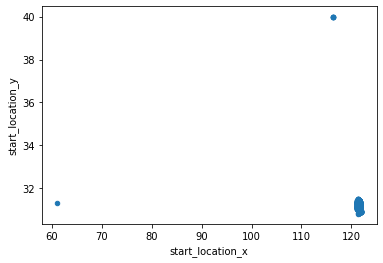

In [3]:
%matplotlib inline
df.plot.scatter(x="start_location_x", y="start_location_y")

In [4]:
# Center the rides on Shanghai city
df_shanghai = df[(df['start_location_x'] > 121.10157) & (df['start_location_x'] < 121.804611) & (df['start_location_y'] > 30.975) & (df['start_location_y'] < 31.514999)]

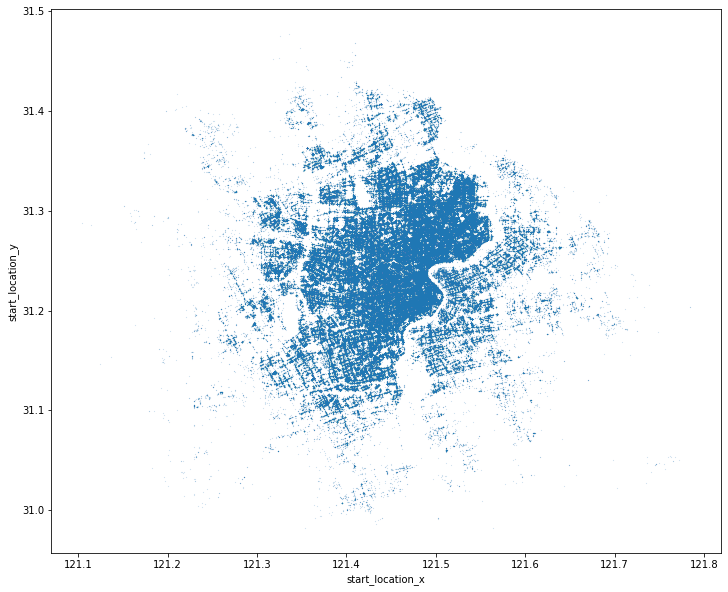

In [5]:
df_shanghai.plot.scatter(x="start_location_x", y="start_location_y", s=0.005, figsize=(12,10))

In [ ]:
df_shanghai["start_time"] = pd.to_datetime(df_shanghai['start_time'])
df_shanghai["end_time"] = pd.to_datetime(df_shanghai['end_time'])
df_shanghai["duration"] = df_shanghai["end_time"] - df_shanghai["start_time"]

In [7]:
from osgeo import osr
old_crs = osr.SpatialReference()
old_crs.ImportFromEPSG(4326)
new_crs = osr.SpatialReference()
new_crs.ImportFromEPSG(4479)
transform = osr.CoordinateTransformation(old_crs, new_crs)

def getNewLongitude(xy):
    return transform.TransformPoint(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transform.TransformPoint(xy[0], xy[1])[1]

In [ ]:
df_shanghai['start_lon'] = df_shanghai[['start_location_x', 'start_location_y']].apply(getNewLongitude, axis=1)
df_shanghai['start_lat'] = df_shanghai[['start_location_x', 'start_location_y']].apply(getNewLatitude, axis=1)
df_shanghai['end_lon'] = df_shanghai[['end_location_x', 'end_location_y']].apply(getNewLongitude, axis=1)
df_shanghai['end_lat'] = df_shanghai[['end_location_x', 'end_location_y']].apply(getNewLatitude, axis=1)

for index, course in df_shanghai:
    track = course["track"].split("#")
    for coord in track
        fake_lon = track 
        fake_lat = 
        track_lon_lat = []
        track_lon_lat.append([getNewLongitude(), getNewLatitude()])

In [11]:
df_shanghai['distance'] = ((df_shanghai['end_lon']-df_shanghai['start_lon'])**2 + (df_shanghai['end_lat']-df_shanghai['start_lat'])**2).apply(math.sqrt)
df_shanghai.head()

/home/aitian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,duration,start_lon,start_lat,end_lon,end_lat,distance
orderid,,,,,,,,,,,,,,,
1,324731,7541,2016-08-28,121.490,31.280,2016-08-28 00:08:00,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",00:08:00,-2.849907e+06,4.652449e+06,-2.849793e+06,4.652991e+06,554.482518
6,288841,4427,2016-08-28,121.462,31.313,2016-08-28 00:17:00,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",00:17:00,-2.846641e+06,4.652220e+06,-2.846013e+06,4.652469e+06,676.222675
8,315873,6474,2016-08-28,121.416,31.154,2016-08-28 00:14:00,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",00:14:00,-2.847670e+06,4.662305e+06,-2.847855e+06,4.662058e+06,308.195446
10,93155,12616,2016-08-28,121.436,31.320,2016-08-28 00:12:00,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",00:12:00,-2.844320e+06,4.653167e+06,-2.845270e+06,4.653261e+06,954.976245
11,352484,11596,2016-08-28,121.459,31.325,2016-08-28 00:08:00,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",00:08:00,-2.846037e+06,4.651779e+06,-2.846419e+06,4.652221e+06,584.154316


In [ ]:
# Not working well - improve later
# from scipy.spatial import distance
# df_shanghai['distance2'] = df_shanghai[['start_lon', 'start_lat', 'end_lon', 'end_lat']].apply(lambda x: distance.euclidean([x[0],x[1]],[x[2],x[3]]))

In [18]:
df_shanghai['speed'] = df_shanghai['distance']/df_shanghai['duration'].apply(lambda x: x.total_seconds())
df_shanghai[df_shanghai['speed'] > 5]

/home/aitian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


orderid
1          1.155172
6          0.662963
8          0.366899
10         1.326356
11         1.216988
13         2.058767
15         1.421382
16         1.430566
17         0.965711
20         1.755723
21         2.380542
22         1.020180
23         0.368089
24         1.434933
28         0.033161
29         0.355428
31         1.649813
33         0.728234
34         1.326776
35         1.435193
36         1.864302
37         0.842397
38         2.040009
41         1.854553
42         0.689712
44         1.059745
45         0.552533
49         1.109844
50         0.427974
51         1.150134
             ...   
1807814    1.136601
1807815    1.281171
1807817    1.840933
1807818    0.695457
1807821    0.952298
1807824    1.431933
1807825    1.454309
1807827    1.071090
1807829    2.051997
1807830    0.618185
1807831    0.618184
1807838    0.150947
1807840    0.367278
1807841    1.397051
1807846    1.689860
1807848    1.644462
1807849    1.847829
1807850    0.429680
1807851    0

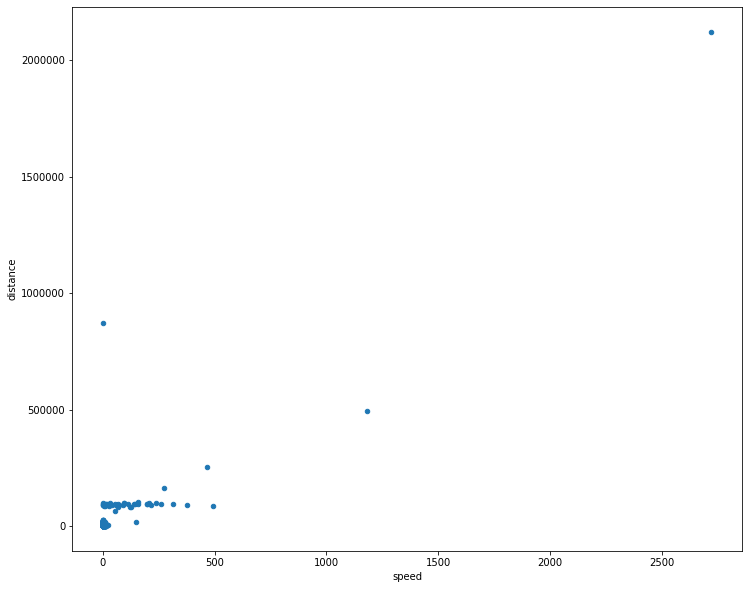

In [17]:
df_shanghai.plot.scatter(x="speed", y="distance", figsize=(12,10))